In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib
%matplotlib inline

# Carregando os dados de indicadores

In [4]:
data_folder = pathlib.Path("data")
indicators_file_path = data_folder / 'indicators.csv'
indicators_df = pd.read_csv(indicators_file_path)

In [5]:
indicators_df.head()

,country,country_iso,core_city,uc_id,cc_avg_dir,cc_avg_undir,cc_wt_avg_dir,cc_wt_avg_undir,circuity,elev_iqr,...,prop_3way,prop_deadend,self_loop_proportion,straightness,uc_names,world_region,world_subregion,resident_pop,area,built_up_area
0,indonesia,IDN,wates,12375,0.036690,0.038630,0.004276,0.004359,1.065403,11.0,...,0.743653,0.171990,0.000619,0.938612,Wates,Asia,South-Eastern Asia,107046,28.0,4.717896
1,brazil,BRA,taquaralto,1186,0.024520,0.035016,0.001195,0.001439,1.008276,18.0,...,0.589312,0.043543,0.000000,0.991791,Taquaralto,Latin America and the Caribbean,South America,90077,20.0,9.620359
2,china,CHN,xinqiao,12218,0.036481,0.045724,0.001608,0.001723,1.016544,2.0,...,0.486911,0.125654,0.000000,0.983725,Xinqiao; Jiepai; Baqiao; Houxiang,Asia,Eastern Asia,104714,42.0,22.057976
3,colombia,COL,yopal,687,0.016110,0.019414,0.001072,0.001221,1.011106,16.0,...,0.583149,0.056171,0.000460,0.989016,Yopal,Latin America and the Caribbean,South America,167421,16.0,5.645732
4,czech_republic,CZE,pilsen,2886,0.032913,0.044298,0.001418,0.001758,1.047311,24.0,...,0.536906,0.250421,0.001013,0.954826,Pilsen,Europe,Eastern Europe,142248,53.0,28.124355


In [6]:
indicators_meta_file_path = data_folder / 'metadata-indicators.csv'
indicators_meta_df = pd.read_csv(indicators_meta_file_path)

In [9]:
indicators_meta_df

,indicator,type,description
0,country,string,Main country name
1,country_iso,string,Main country ISO 3166-1 alpha-3 code
2,core_city,string,Urban center core city name
3,uc_id,int,Urban center unique ID
4,cc_avg_dir,float,Average clustering coefficient (directed)
5,cc_avg_undir,float,Average clustering coefficient (undirected)
6,cc_wt_avg_dir,float,Average clustering coefficient (weighted/direc...
7,cc_wt_avg_undir,float,Average clustering coefficient (weighted/undir...
8,circuity,float,Ratio of street lengths to straightline distances
9,elev_iqr,float,"Interquartile range of node elevations, meters"


## Quantidade de entradas

In [31]:
len(indicators_df)

8914

## Entradas por região geográfica

### Região Maior

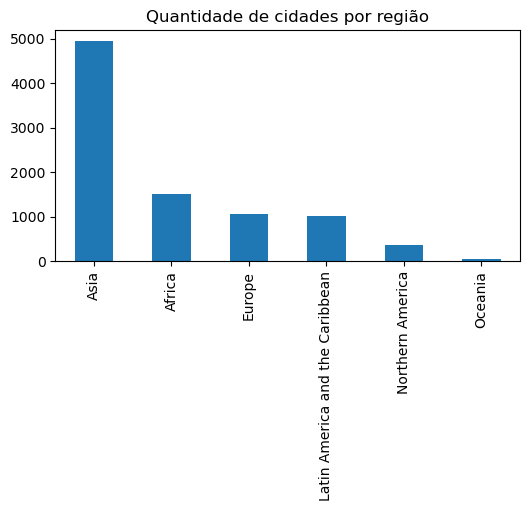

In [30]:
plt.figure(figsize=(6,3))
indicators_df['world_region'].value_counts().plot(kind='bar')
plt.title("Quantidade de cidades por região")
plt.show()

## Região Menor

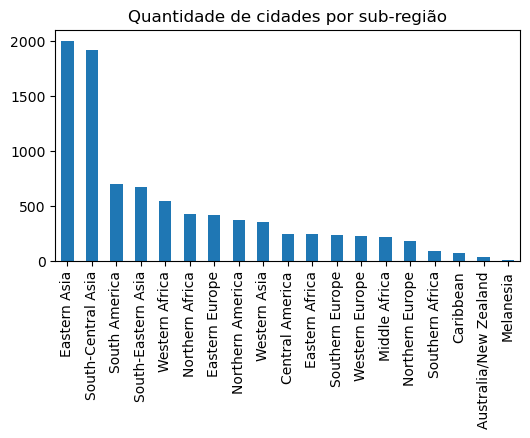

In [38]:
plt.figure(figsize=(6,3))
indicators_df['world_subregion'].value_counts().plot(kind='bar')
plt.title("Quantidade de cidades por sub-região")
plt.show()

# Entradas por país

Número de países diferentes com entradas

In [59]:
len(indicators_df['country'].value_counts())

178

## Distribuição

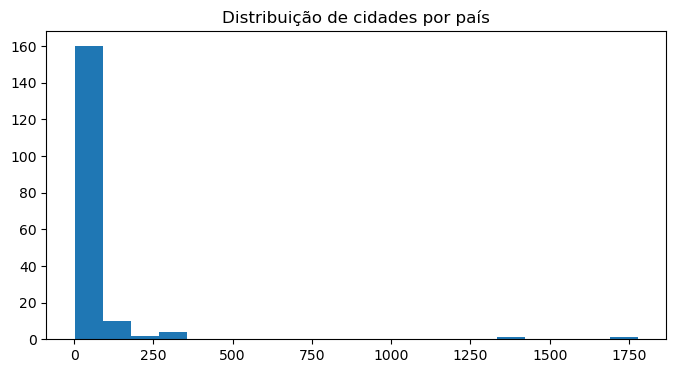

In [58]:
plt.figure(figsize=(8, 4))
plt.hist(indicators_df['country'].value_counts(), bins=20)
plt.title("Distribuição de cidades por país")
plt.show()

## Top 30

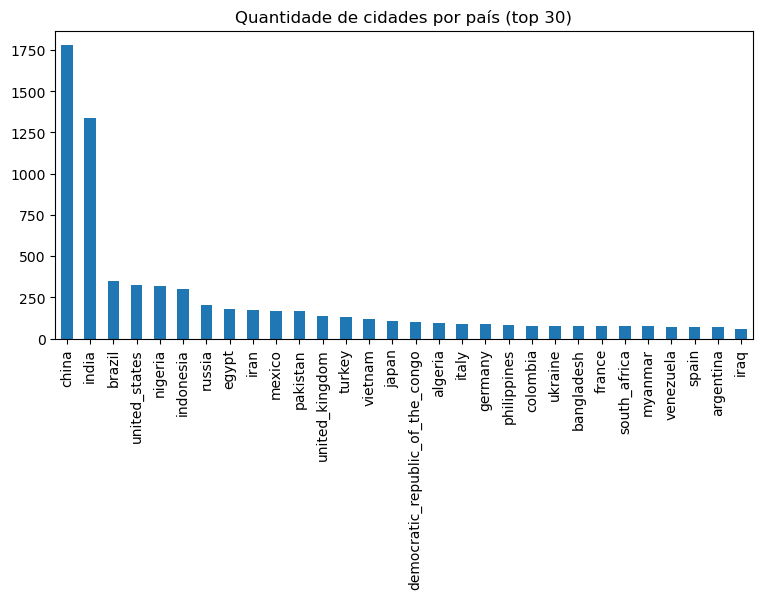

In [66]:
plt.figure(figsize=(9,4))
indicators_df['country'].value_counts()[:30].plot(kind='bar')
plt.title("Quantidade de cidades por país (top 30)")
plt.show()

## Bottom 30

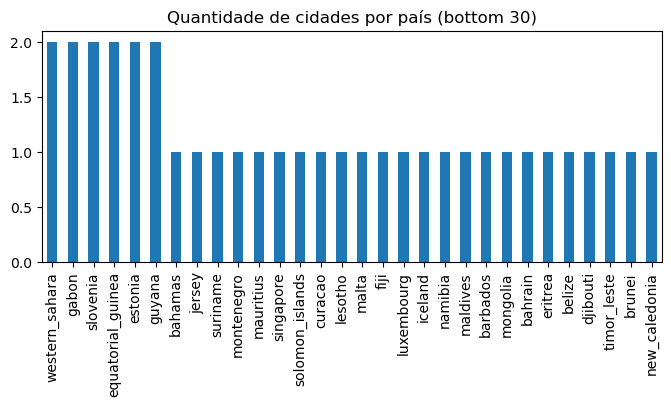

In [62]:
plt.figure(figsize=(8,3))
indicators_df['country'].value_counts()[-30:].plot(kind='bar')
plt.title("Quantidade de cidades por país (bottom 30)")
plt.show()

# Indicadores Por Região

In [83]:
def plot_indicator_by_region(indicator):
    sns.catplot(data=indicators_df, x="world_region", y=indicator, kind="box", height=5, aspect=1.5)
    plt.xticks(rotation=45)
    plt.title(indicator)
    plt.show()

In [88]:
target_indicators = []
target_indicators.extend(indicators_df.columns[4:33])
target_indicators.extend(indicators_df.columns[36:])

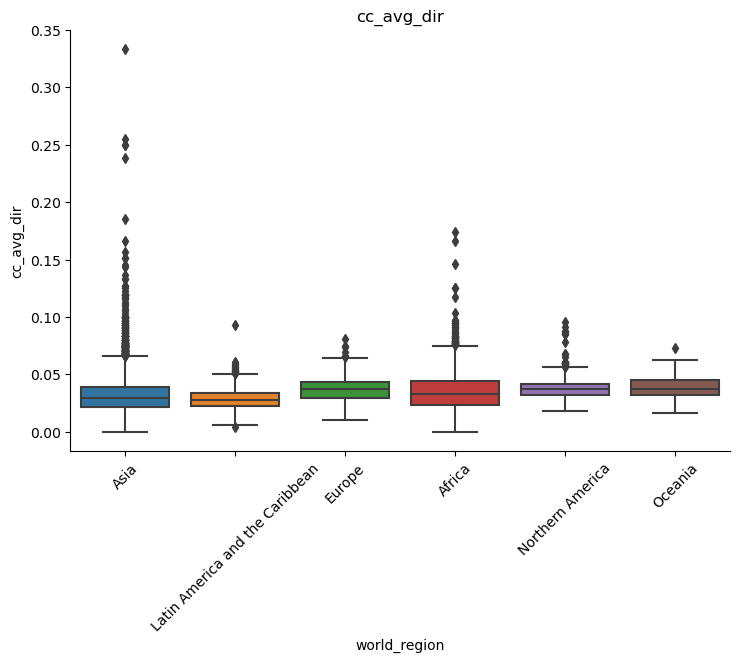

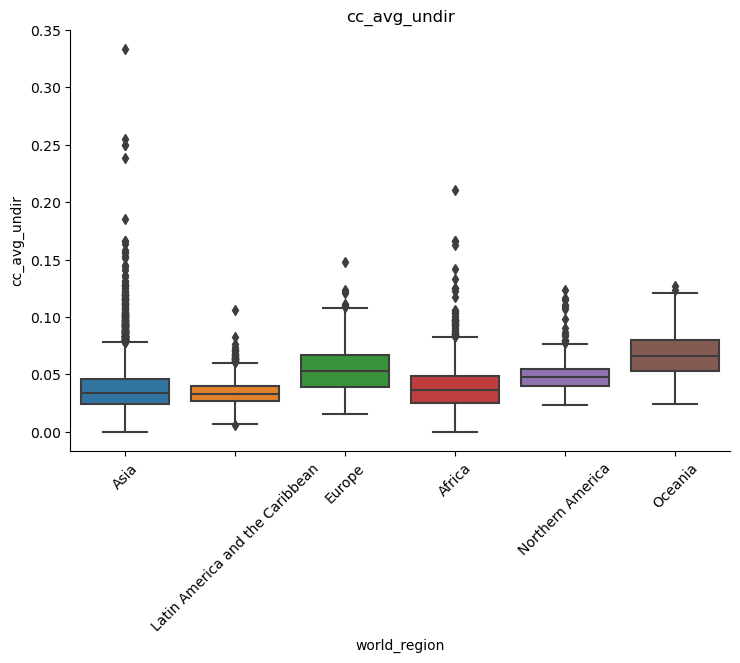

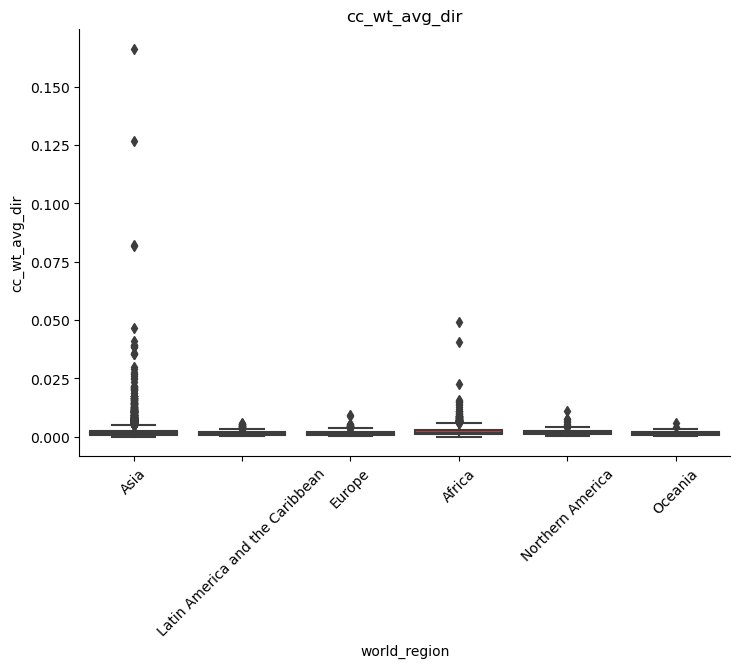

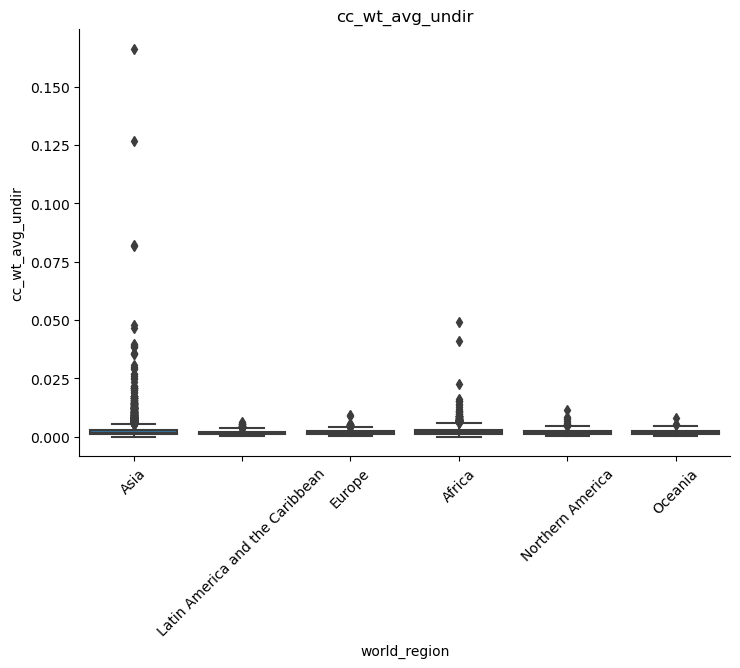

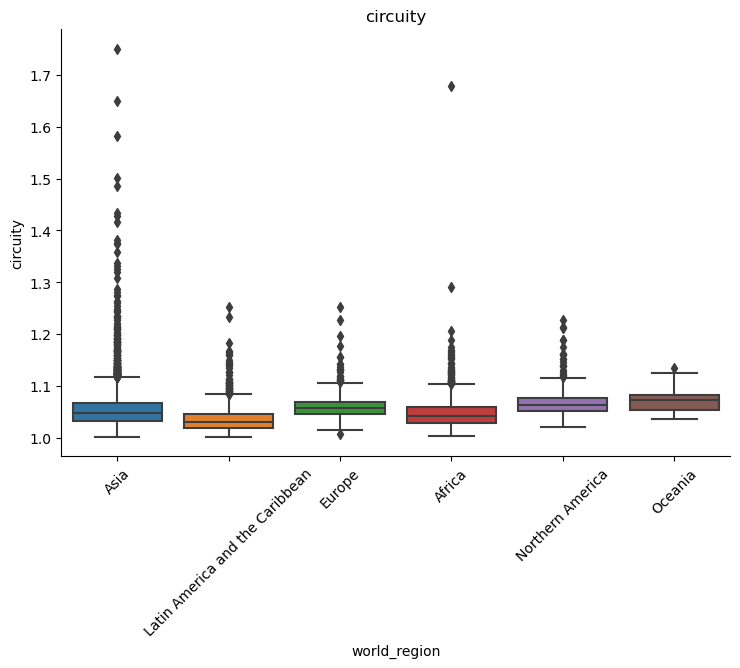

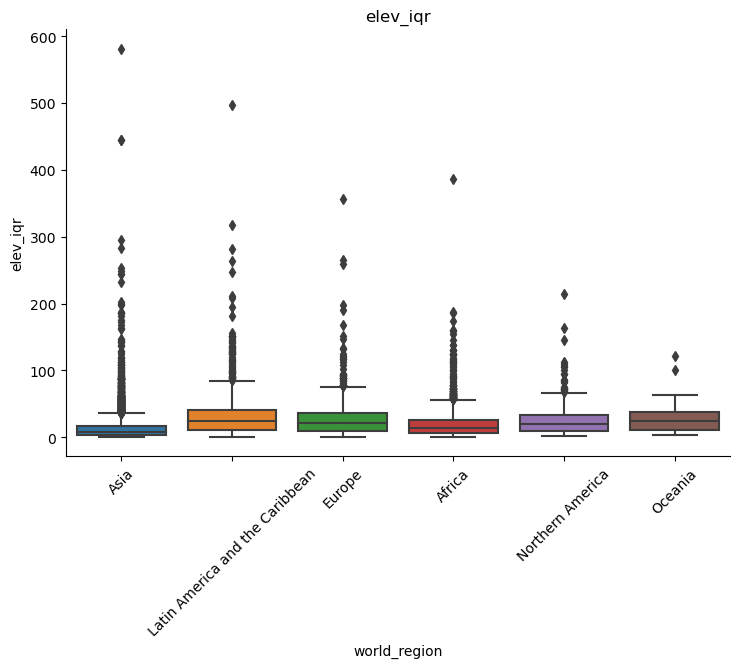

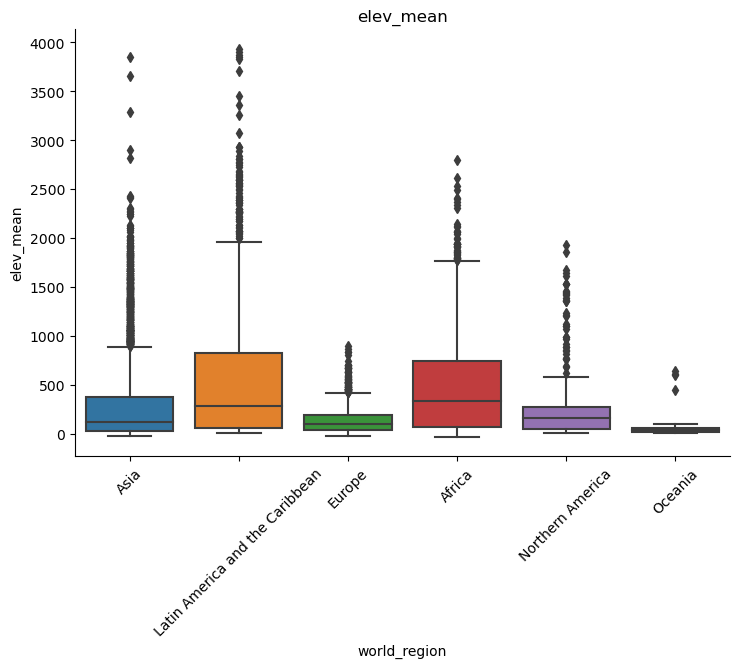

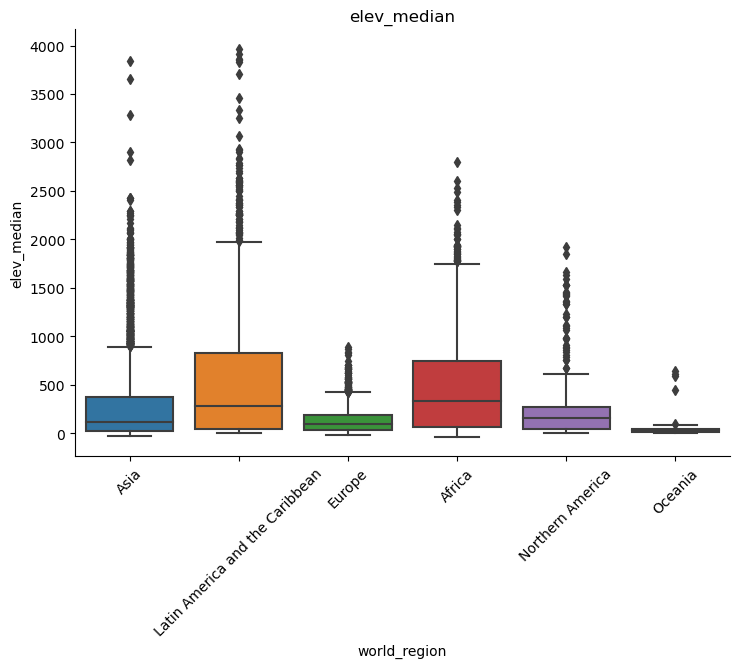

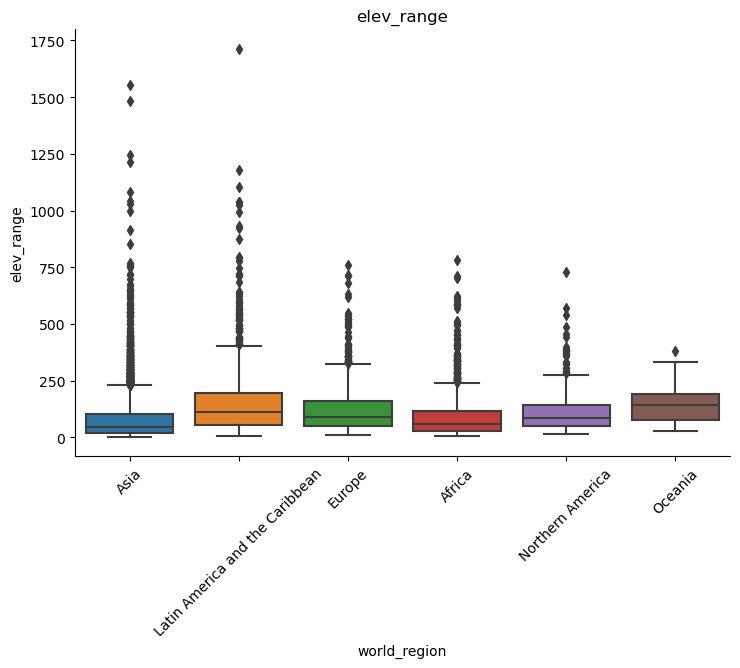

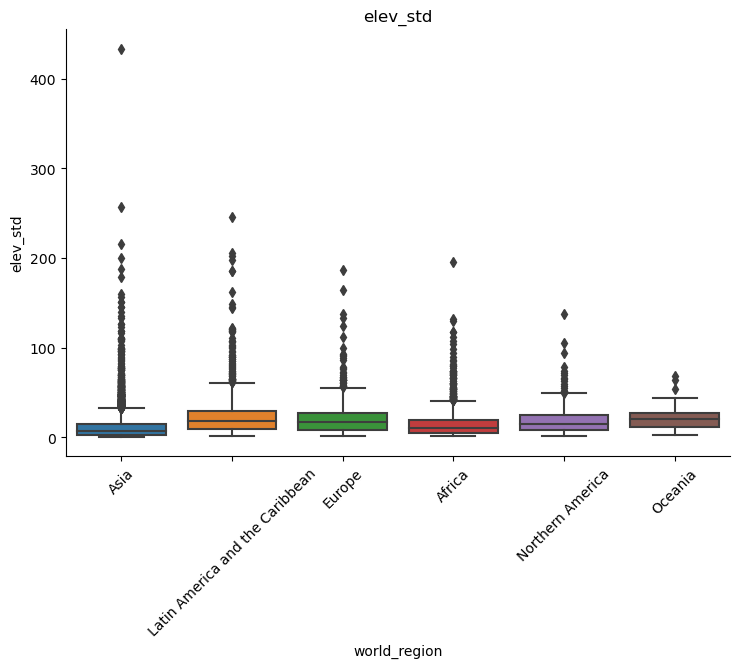

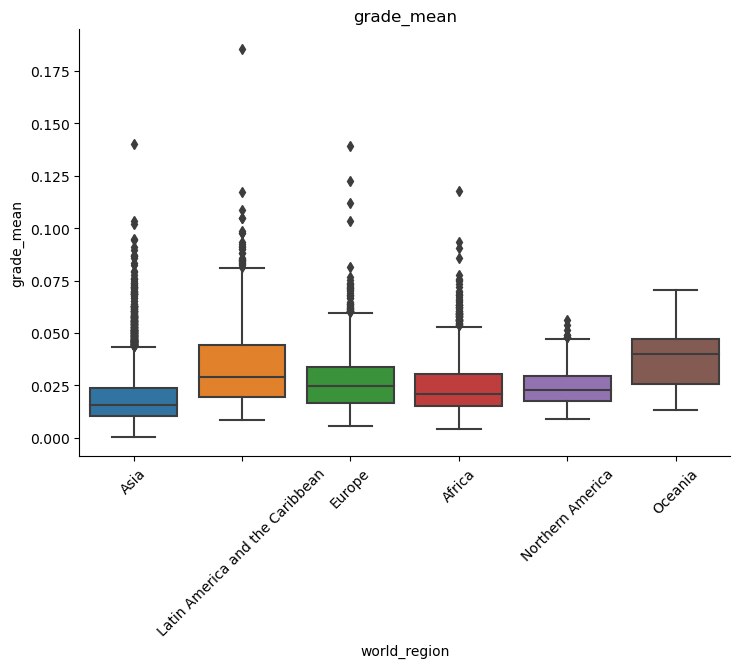

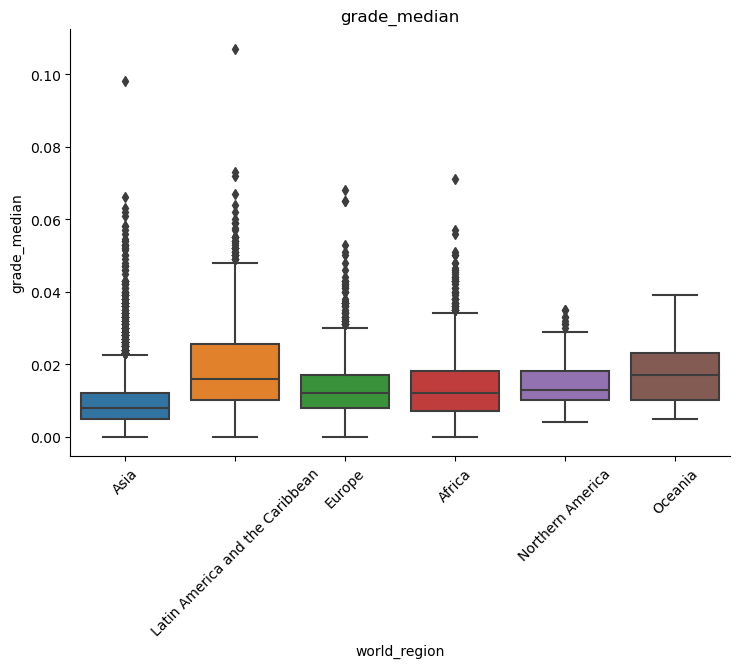

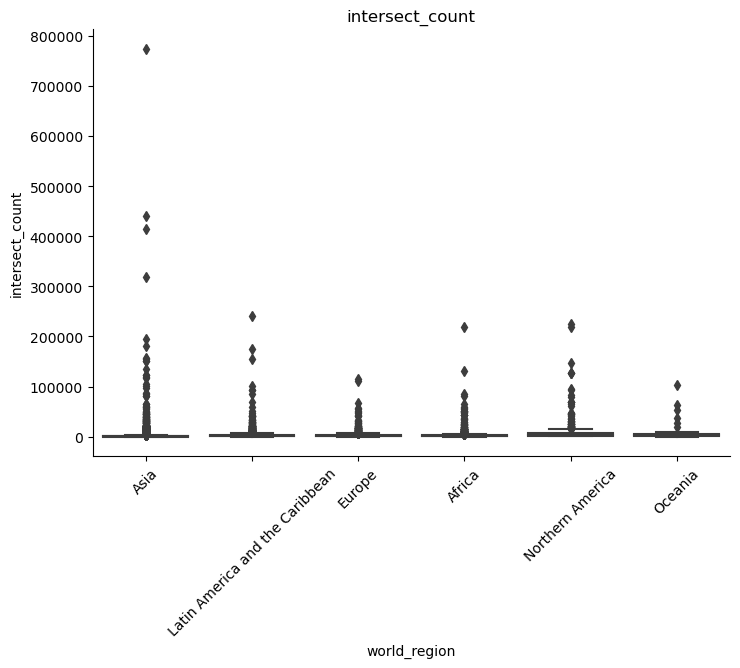

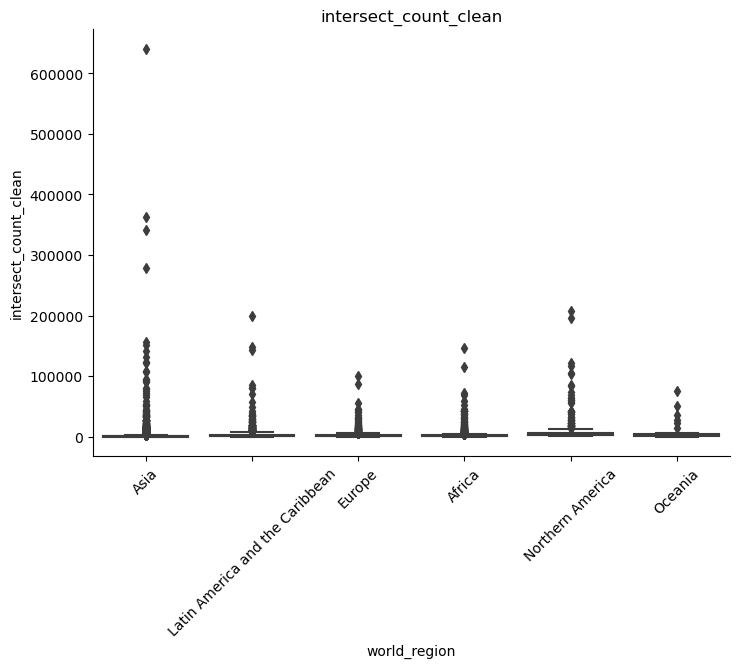

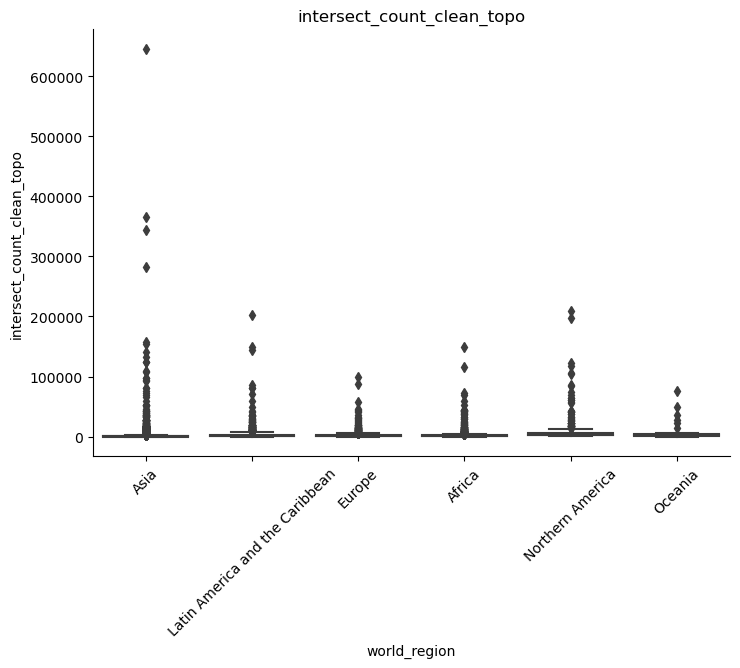

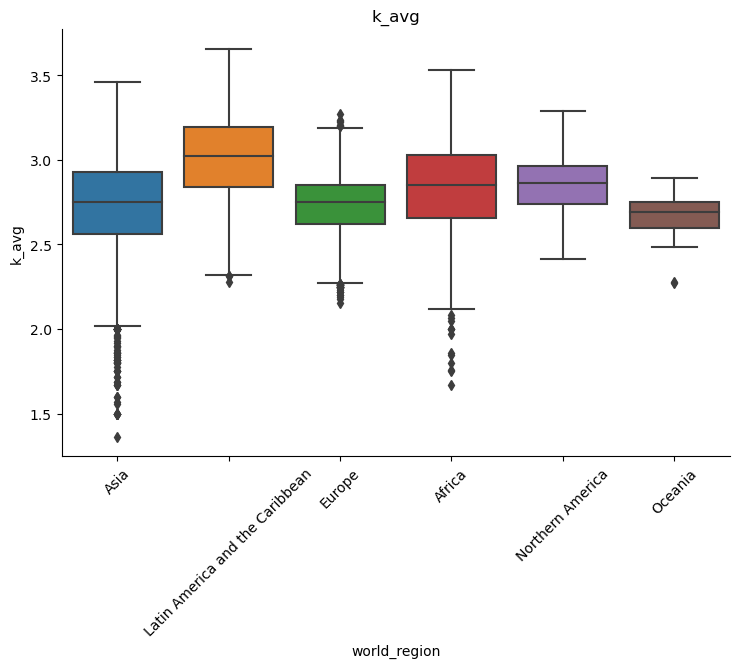

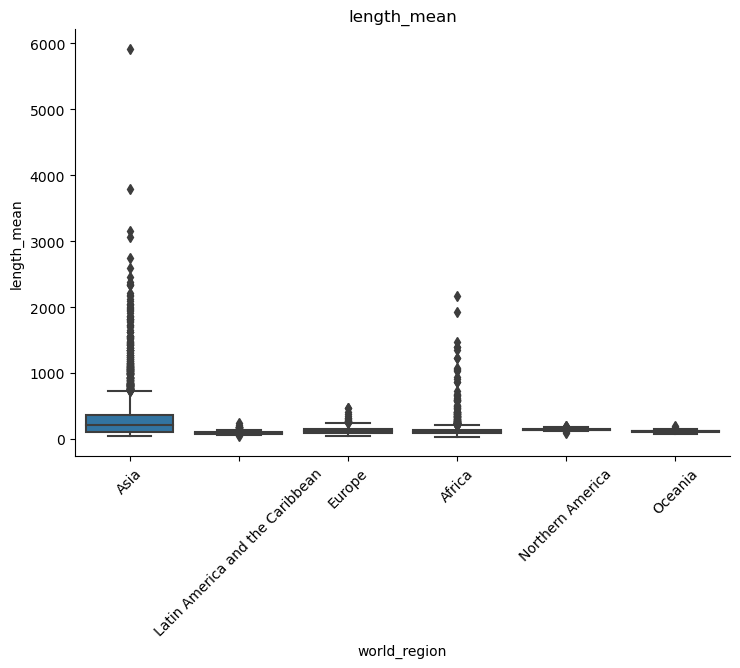

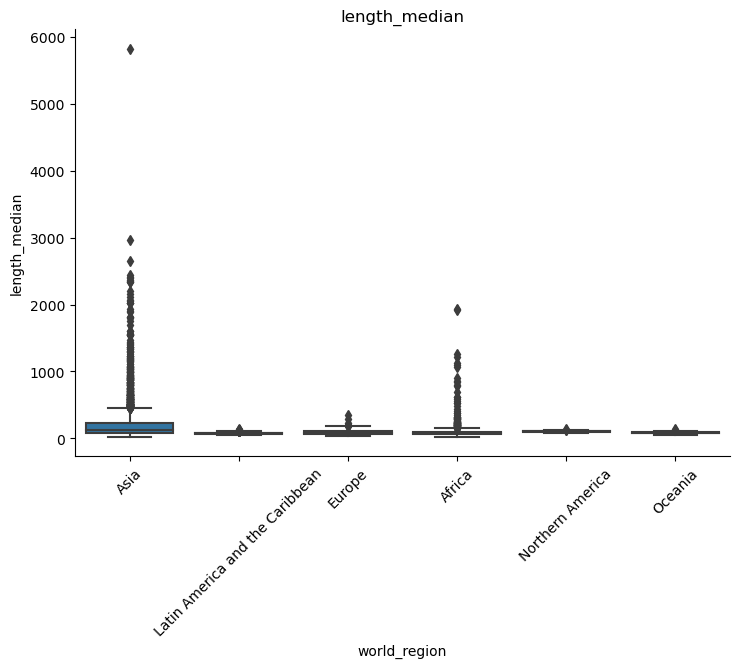

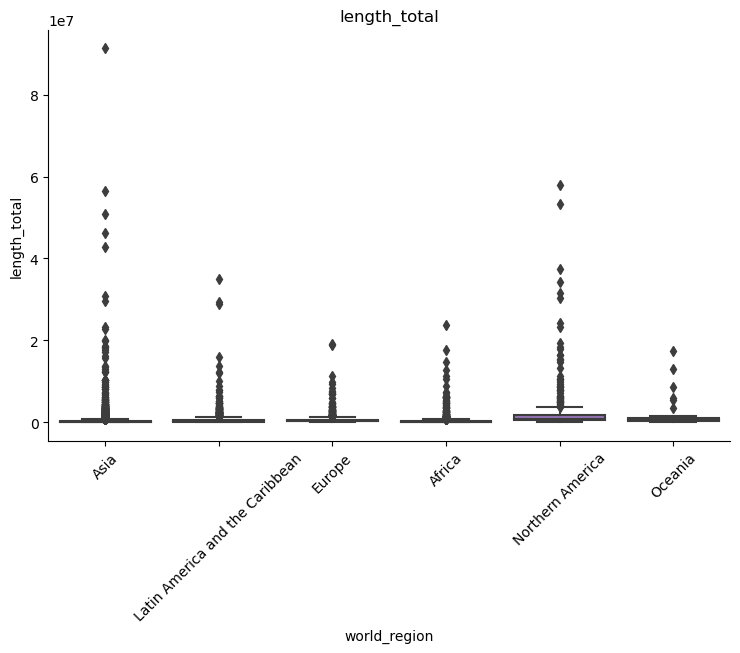

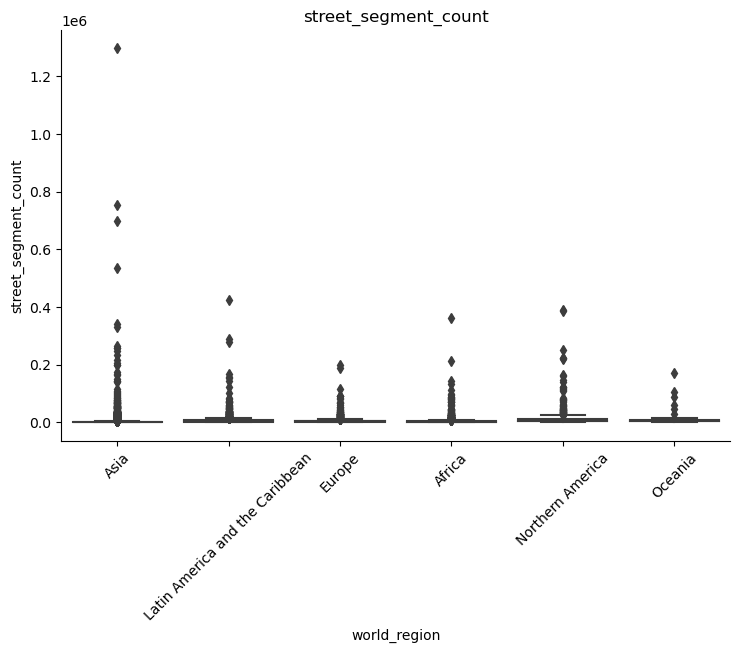

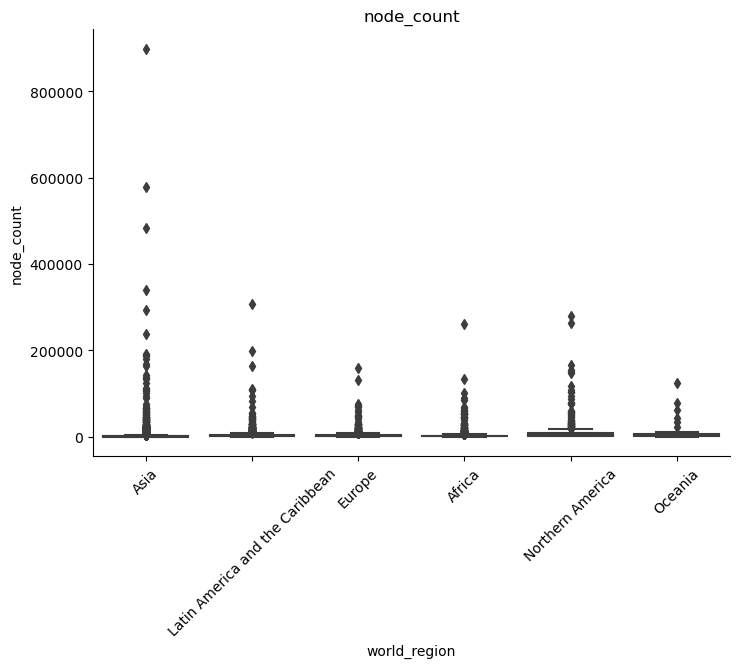

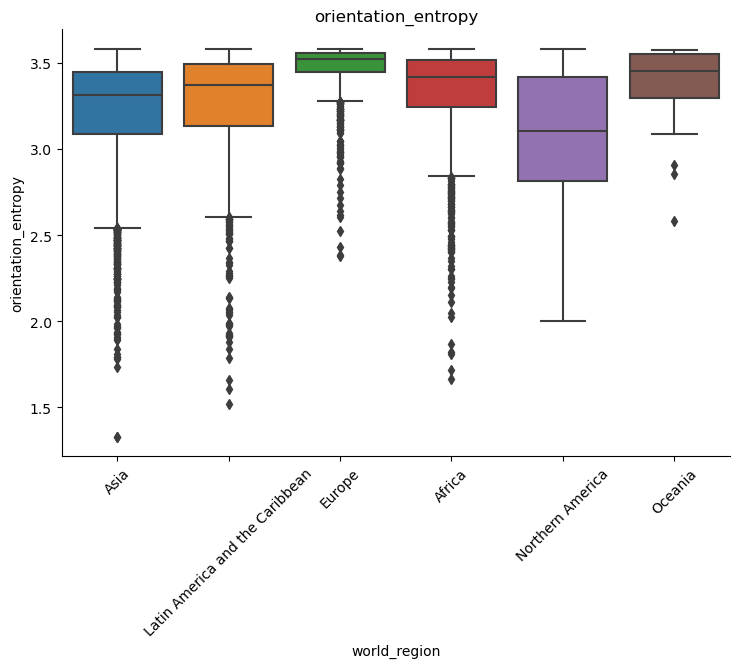

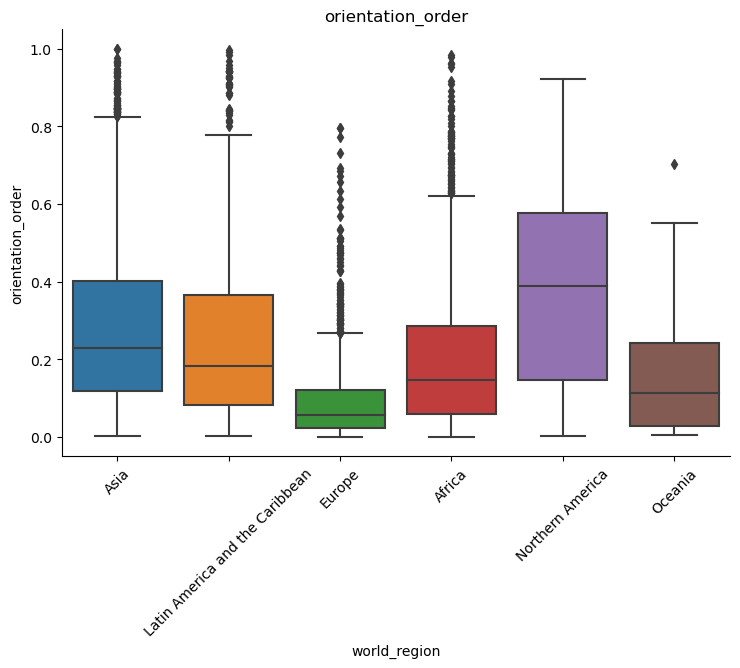

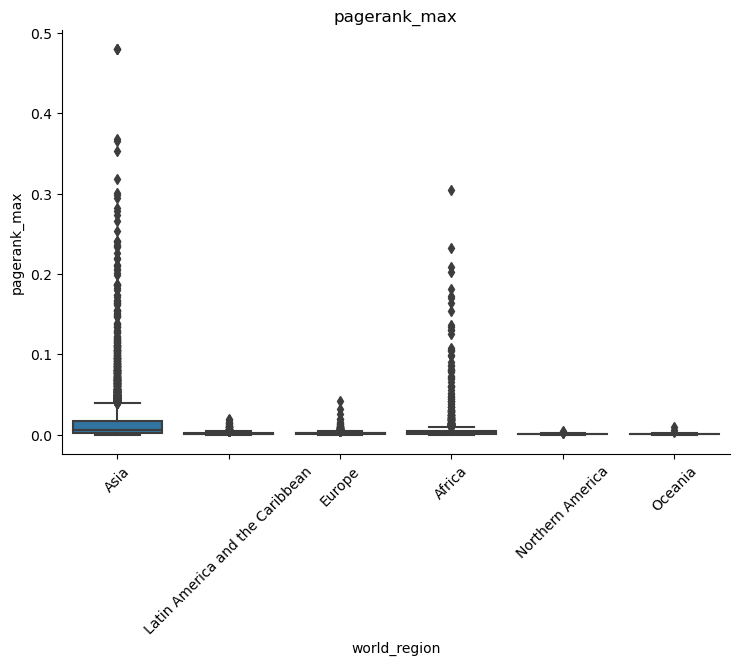

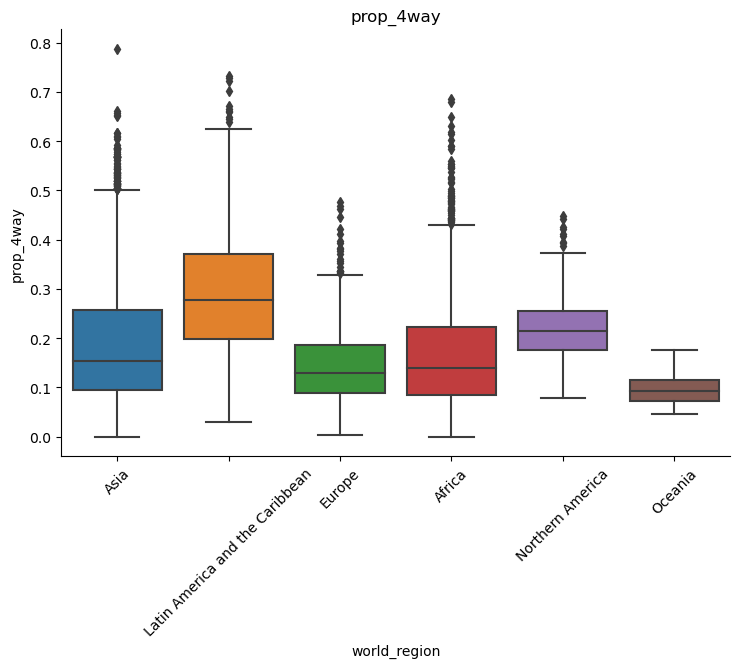

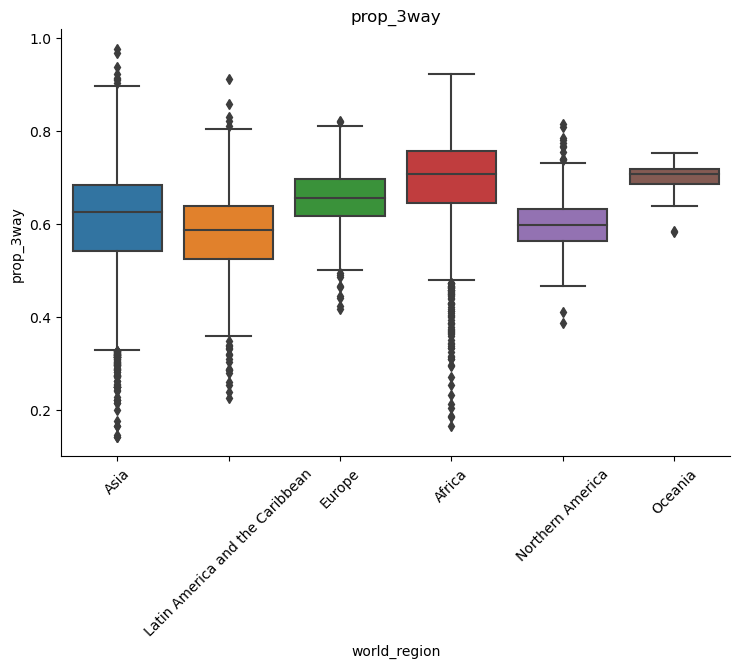

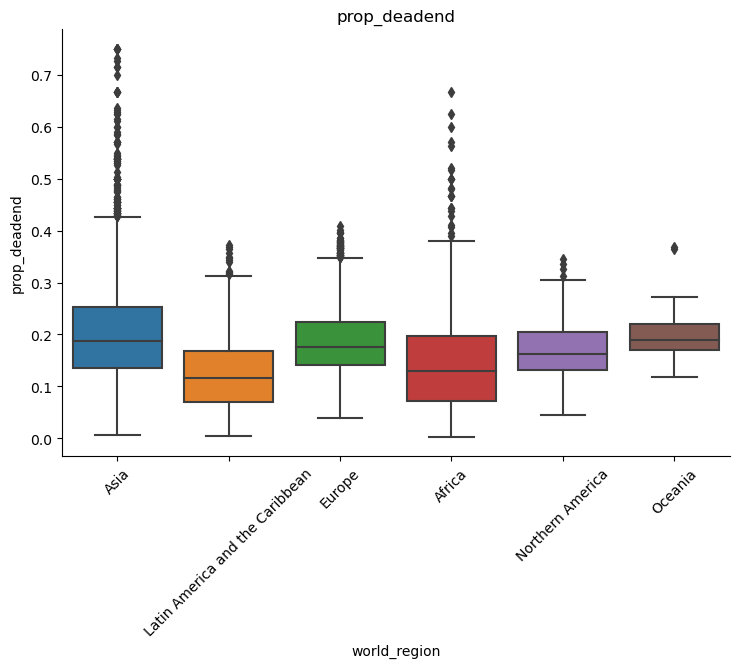

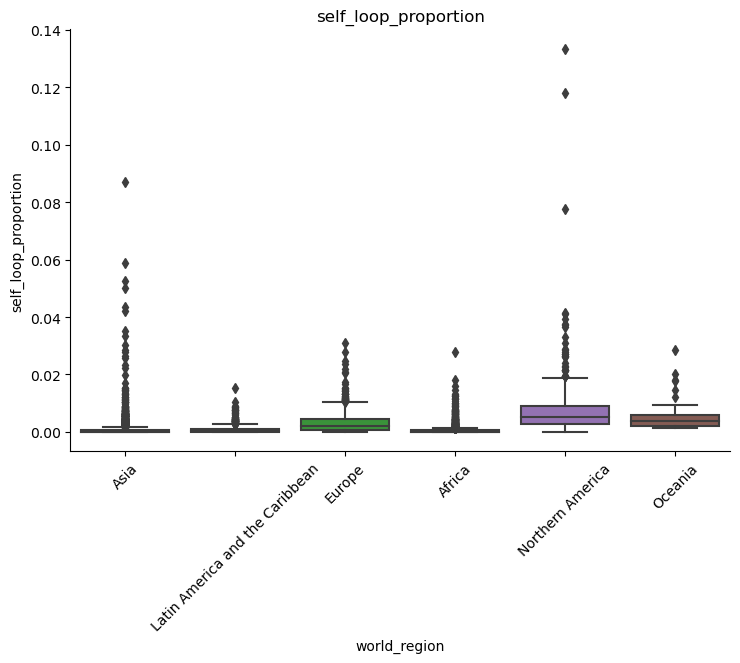

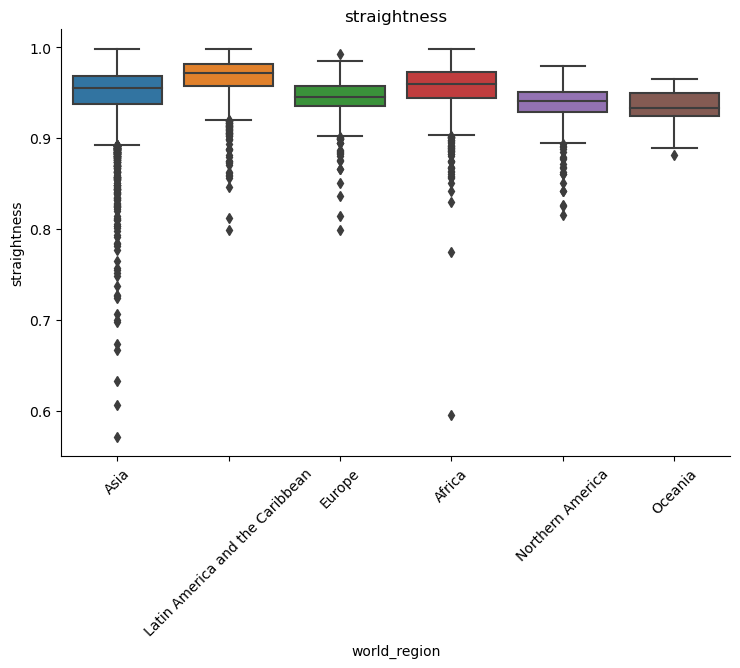

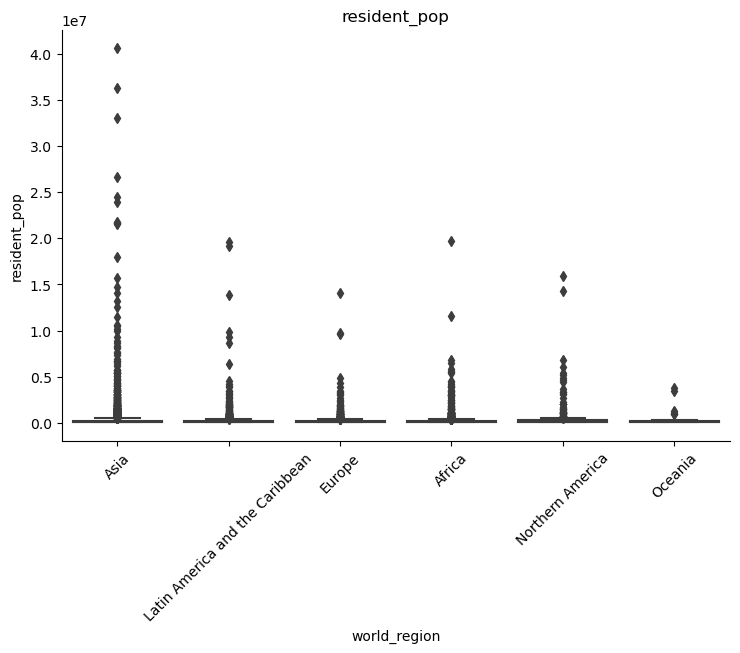

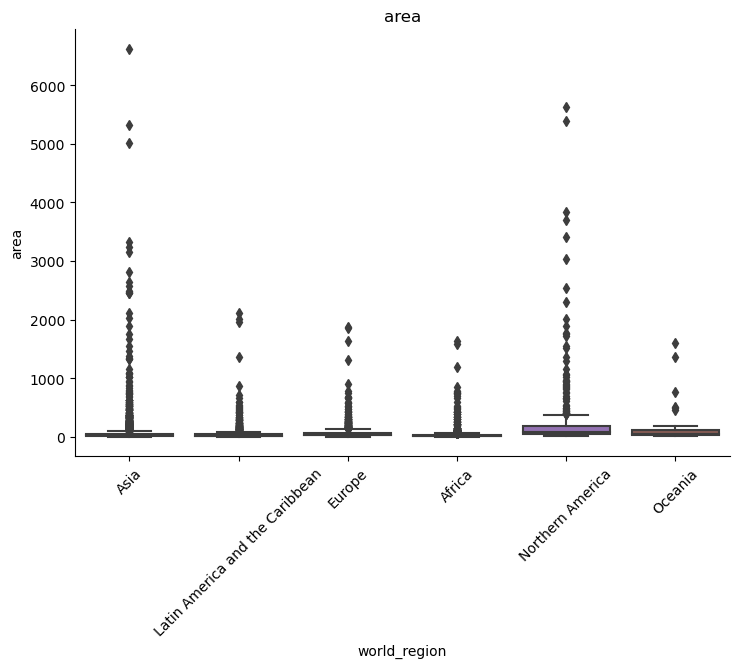

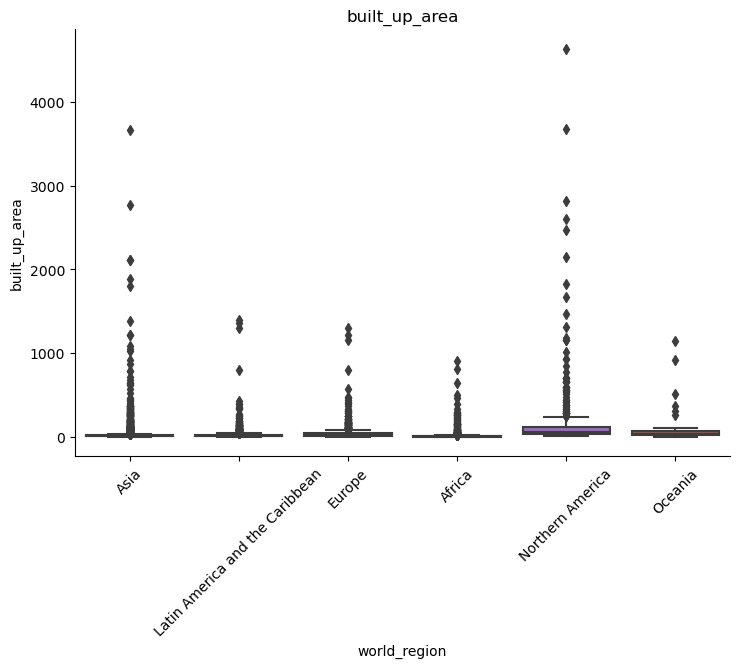

In [89]:
for indicator in target_indicators:
    plot_indicator_by_region(indicator)

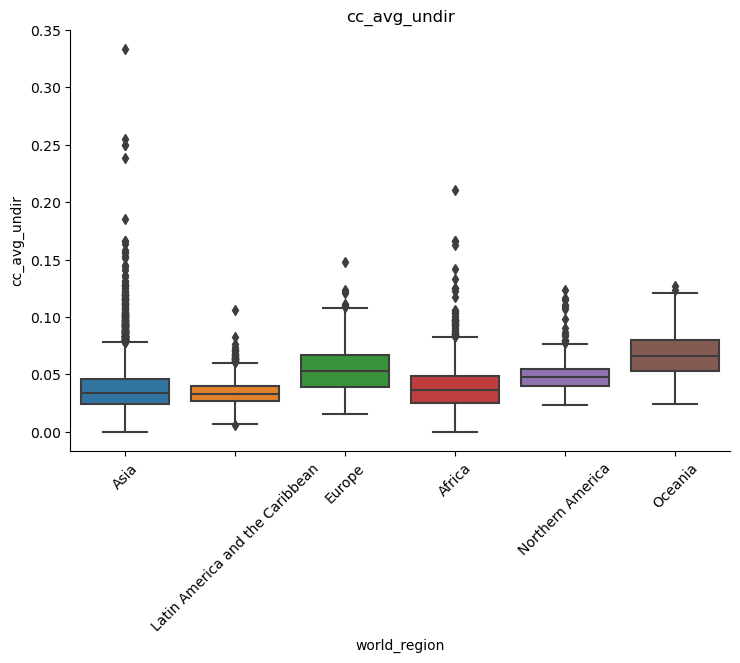

In [85]:
plot_indicator_by_region("cc_avg_undir")

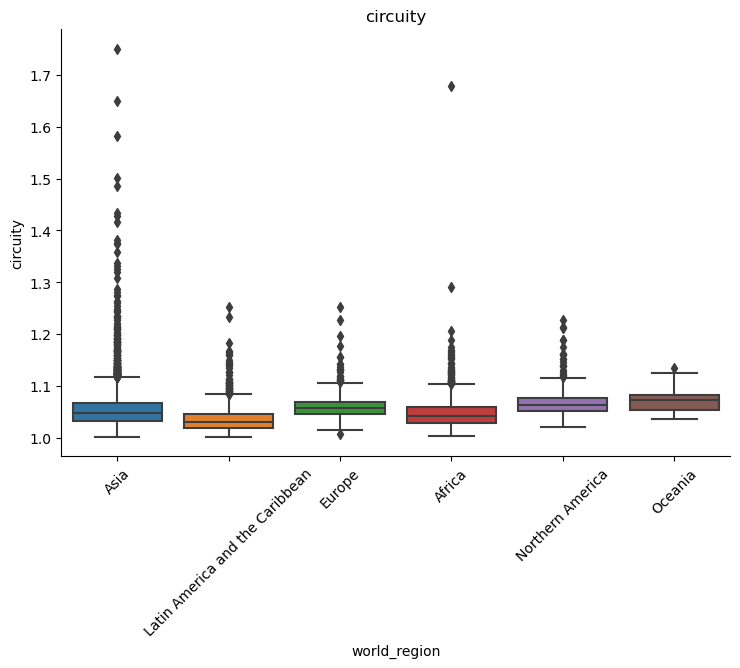

In [86]:
plot_indicator_by_region("circuity")